<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/joon0425/20230301/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사 하강법 구현

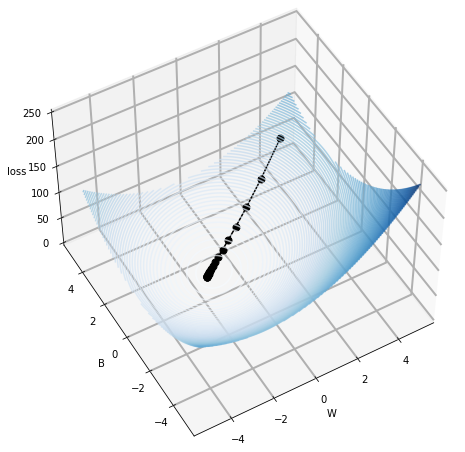

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def L(u,v):
  return 3*u**2+3*v**2-u*v+7*u-7*v+10
def Lu(u,v):
  return 6*u-u+7
def Lv(u,v):
  return 6*v-u-7
u=np.linspace(-5,5,501)
v=np.linspace(-5,5,501)
U,V=np.meshgrid(u,v) 
Z=L(U,V) # U,V 평면에 대한 함수값 Z np array 생성

#경사 하강법 시뮬레이션
W=np.array([4.0,4.0]) # 초기값. 초기값에 따라서 최소 지점이 달라질 수 있음(L 함수는 U,V에 대한 함수값 Z가 convex한 특징을 지님)
W1=[W[0]]
W2=[W[1]] # W1:U, W2:V 에 대해 각 스텝에 대한 history 저장
N=21 # 스텝 반복 횟수
alpha=0.05 # 학습률
for i in range(N):
  W=W-alpha*np.array([Lu(W[0],W[1]),Lv(W[0],W[1])])
  W1.append(W[0])
  W2.append(W[1])

#그래프 그리기
WW1=np.array(W1) # numpy 배열화
WW2=np.array(W2)
ZZ=L(WW1,WW2) # history들의 함수값
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(50,240)
ax.xaxis._axinfo["grid"]['linewidth']=2.
ax.yaxis._axinfo["grid"]['linewidth']=2.
ax.zaxis._axinfo["grid"]['linewidth']=2.
ax.contour3D(U,V,Z,100,cmap='Blues',alpha=0.7)
ax.plot3D(WW1,WW2,ZZ,'o-',c='k',alpha=1,markersize=7)
plt.show()